<a href="https://colab.research.google.com/github/soyHouston256/CodeJam/blob/master/modulo4_analisis_exploratorio/Correlations_and_associations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://posgrado.utec.edu.pe/sites/default/files/2023-08/Testimonial-home-2.jpg" alt="HTML5 Icon" width="900" height="250" >

# **Laboratorio: Correlaciones y Asociaciones en Desempeño Estudiantil**

---

## **Objetivo general**

Aplicar medidas de correlación y asociación entre variables numéricas y categóricas en un dataset real de rendimiento académico, utilizando tanto herramientas estadísticas como visualización avanzada.

## **1. Introducción**

Este laboratorio busca explorar relaciones entre variables numéricas como math score, reading score y writing score, así como entre variables categóricas como gender, parental education, y test preparation course. Aprenderemos a elegir correctamente entre Pearson, Spearman, Kendall, Chi-cuadrado, Cramér’s V y Phi, según el tipo de variables involucradas.

## **2. Dataset**

Usaremos el dataset:

Students Performance in Exams

Fuente: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams




Este dataset contiene registros de exámenes de estudiantes en tres materias, junto con información demográfica y socioeconómica. Las columnas son:


- gender: sexo del estudiante

- race/ethnicity: grupo étnico

- parental level of education: educación del padre

- lunch: tipo de almuerzo

- test preparation course: curso de preparación

- math score, reading score, writing score: puntajes obtenidos

## **3. Carga y exploración inicial**



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau, chi2_contingency
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")
df.columns = df.columns.str.replace(" ", "_")
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **4. Correlación entre variables numéricas**


Pearson mide relaciones lineales.

Spearman evalúa relaciones monótonas basadas en rangos.

Kendall mide la concordancia de pares (orden total).

**Correlaciones**

In [3]:
num_cols = ['math_score', 'reading_score', 'writing_score']
corr_methods = ['pearson', 'spearman', 'kendall']

for method in corr_methods:
    print(f"\nMatriz de correlación - {method.title()}:")
    display(df[num_cols].corr(method=method).round(3))



Matriz de correlación - Pearson:


,math_score,reading_score,writing_score
math_score,1.000,0.818,0.803
reading_score,0.818,1.000,0.955
writing_score,0.803,0.955,1.000



Matriz de correlación - Spearman:


,math_score,reading_score,writing_score
math_score,1.000,0.804,0.778
reading_score,0.804,1.000,0.949
writing_score,0.778,0.949,1.000



Matriz de correlación - Kendall:


,math_score,reading_score,writing_score
math_score,1.000,0.617,0.591
reading_score,0.617,1.000,0.820
writing_score,0.591,0.820,1.000


**Visualización**

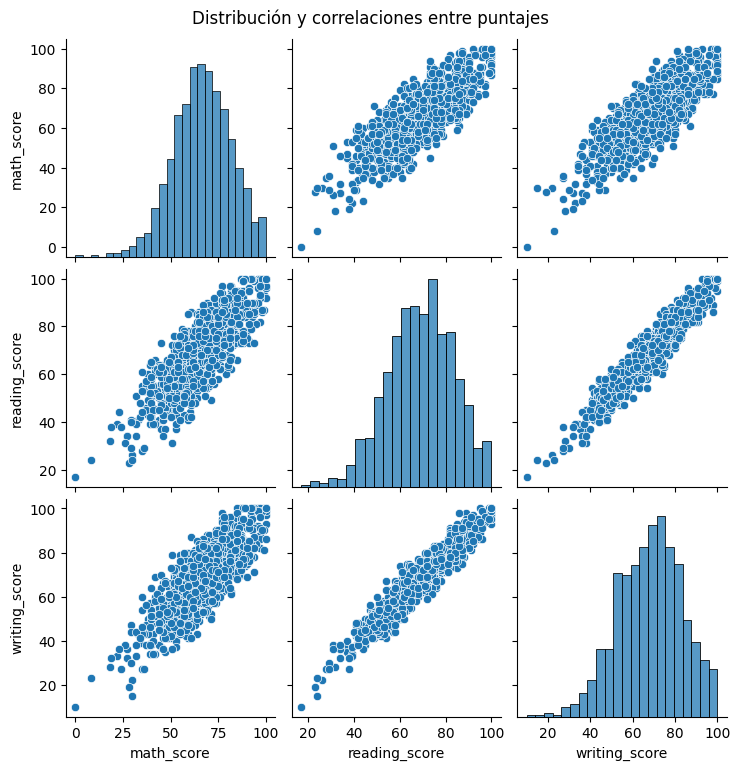

In [4]:
sns.pairplot(df[num_cols])
plt.suptitle("Distribución y correlaciones entre puntajes", y=1.02)
plt.show()


## **5. Asociación entre variables categóricas**


Usamos Chi-cuadrado para evaluar independencia entre categorías.

Para la fuerza, aplicamos Cramér’s V.

Si es 2x2, podemos usar Phi.

**Implementación de Cramér’s V y Phi**

In [5]:
from scipy.stats import chi2_contingency

def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    r, k = conf_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def phi(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    return np.sqrt(chi2 / n)


In [6]:
# Chi-cuadrado + Cramér’s V entre género y curso de preparación
ct = pd.crosstab(df.gender, df.test_preparation_course)
chi2, p, dof, exp = chi2_contingency(ct)

print(f"Chi² = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér’s V = {cramers_v(ct):.3f}")


Chi² = 0.02, p = 0.9008
Cramér’s V = 0.004


## **6. Comparaciones mixtas (categórica vs. numérica)**


**Visualización de diferencias**

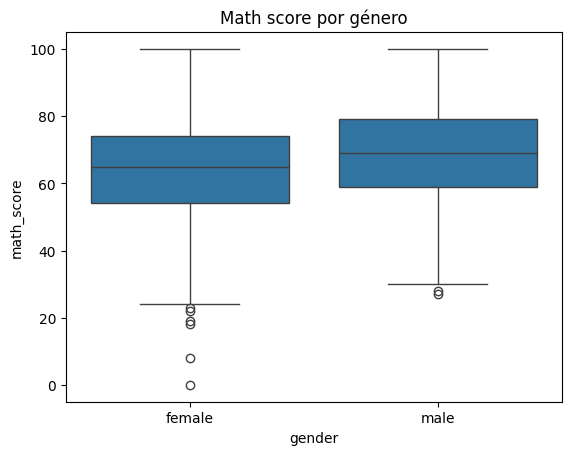

In [7]:
sns.boxplot(data=df, x='gender', y='math_score')
plt.title("Math score por género")
plt.show()


**ANOVA (opcional)**

In [8]:
from scipy.stats import f_oneway

grupo_h = df[df.gender == 'male']['math_score']
grupo_m = df[df.gender == 'female']['math_score']

f_stat, p = f_oneway(grupo_h, grupo_m)
print(f"ANOVA: F = {f_stat:.2f}, p = {p:.4f}")


ANOVA: F = 28.98, p = 0.0000


# **7. Visualización integrada**


**Heatmap de correlación numérica**

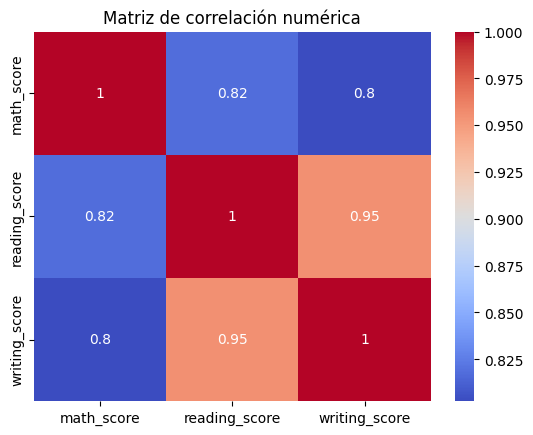

In [9]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación numérica")
plt.show()


**Heatmap de Cramér’s V entre categóricas**

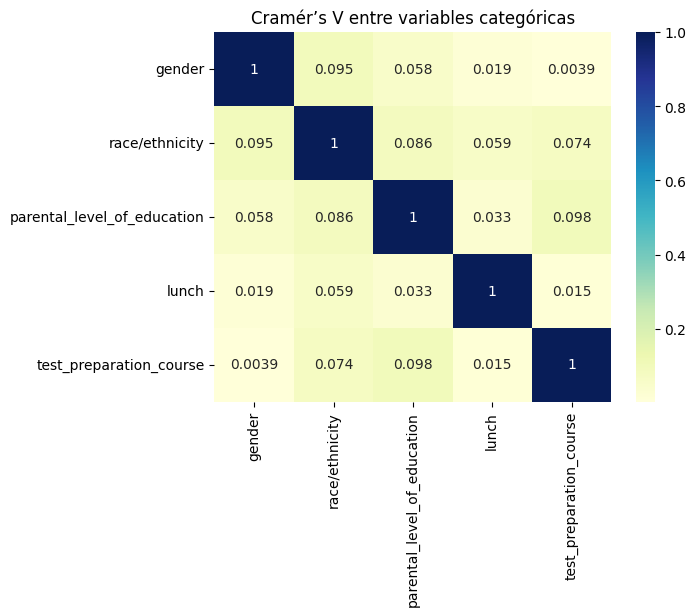

In [10]:
cat_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
mat = pd.DataFrame(index=cat_cols, columns=cat_cols)

for i in cat_cols:
    for j in cat_cols:
        mat.loc[i,j] = cramers_v(pd.crosstab(df[i], df[j]))

sns.heatmap(mat.astype(float), annot=True, cmap='YlGnBu')
plt.title("Cramér’s V entre variables categóricas")
plt.show()


## **8. Actividades finales**


**8.1 Comparación entre métodos de correlación**

- ¿Cuál da valores más altos entre Spearman y Kendall?

- ¿Qué pares de puntajes están más correlacionados?


--- Comparación de Métodos de Correlación ---

Matriz de Correlación de Spearman:
               math score  reading score  writing score
math score       1.000000       0.804064       0.778339
reading score    0.804064       1.000000       0.948953
writing score    0.778339       0.948953       1.000000

Matriz de Correlación de Kendall:
               math score  reading score  writing score
math score       1.000000       0.617432       0.591067
reading score    0.617432       1.000000       0.820058
writing score    0.591067       0.820058       1.000000

--- Par de Puntajes Más Correlacionado ---
El par con la correlación más alta es: ('reading score', 'writing score')
Valor de correlación de Spearman: 0.9490


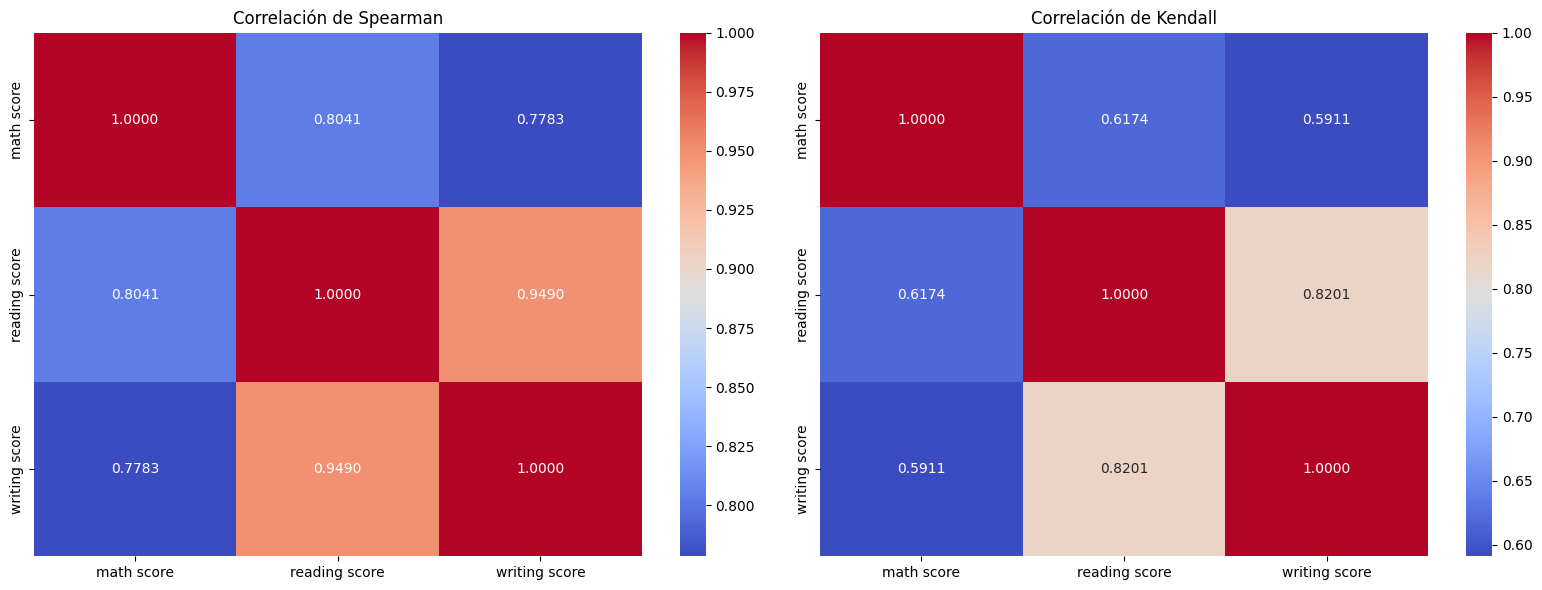

In [14]:
# Cargar el conjunto de datos
df = pd.read_csv('StudentsPerformance.csv')

# Seleccionar solo las columnas de puntajes
scores_df = df[['math score', 'reading score', 'writing score']]

# --- 1. Calcular las correlaciones de Spearman y Kendall ---
spearman_corr = scores_df.corr(method='spearman')
kendall_corr = scores_df.corr(method='kendall')

print("--- Comparación de Métodos de Correlación ---")
print("\nMatriz de Correlación de Spearman:")
print(spearman_corr)
print("\nMatriz de Correlación de Kendall:")
print(kendall_corr)

# Se usa la matriz de Spearman por tener valores más altos
# Se crea una copia para no modificar la original
corr_unstacked = spearman_corr.unstack()
# Se quitan las correlaciones de una variable consigo misma (valor = 1.0)
corr_unstacked = corr_unstacked[corr_unstacked != 1]

# Encontrar el valor y el par con la correlación máxima
highest_corr_value = corr_unstacked.max()
most_correlated_pair = corr_unstacked.idxmax()

print("\n--- Par de Puntajes Más Correlacionado ---")
print(f"El par con la correlación más alta es: {most_correlated_pair}")
print(f"Valor de correlación de Spearman: {highest_corr_value:.4f}")


# --- 3. Visualización con Heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mapa de calor de Spearman
sns.heatmap(spearman_corr, annot=True, fmt='.4f', cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlación de Spearman')

# Mapa de calor de Kendall
sns.heatmap(kendall_corr, annot=True, fmt='.4f', cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlación de Kendall')

plt.tight_layout()
plt.show()



**8.2 Asociación significativa**

- ¿Qué variables categóricas muestran relaciones más fuertes según Cramér’s V?



Calculando la matriz de V de Cramer...

--- Matriz de Asociación (V de Cramer) ---
                             gender  race/ethnicity  \
gender                       1.0000          0.0709   
race/ethnicity               0.0709          1.0000   
parental level of education  0.0000          0.0487   
lunch                        0.0000          0.0000   
test preparation course      0.0000          0.0385   

                             parental level of education  lunch  \
gender                                            0.0000    0.0   
race/ethnicity                                    0.0487    0.0   
parental level of education                       1.0000    0.0   
lunch                                             0.0000    1.0   
test preparation course                           0.0674    0.0   

                             test preparation course  
gender                                        0.0000  
race/ethnicity                                0.0385  
parental level of 

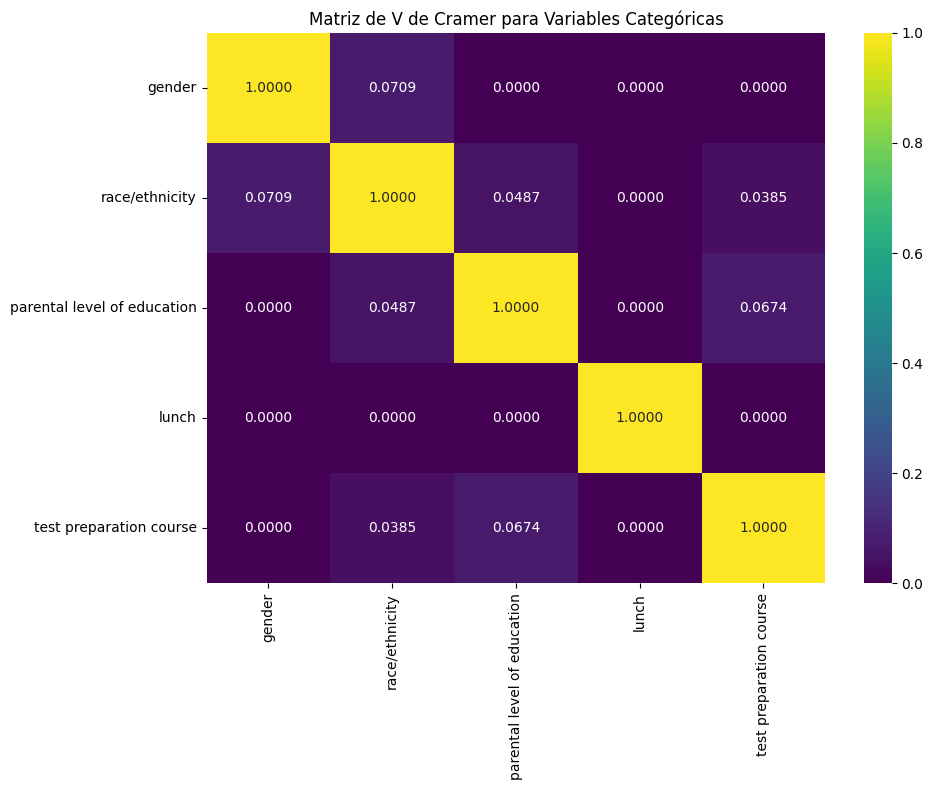

In [17]:
from itertools import combinations
df = pd.read_csv('StudentsPerformance.csv')

# 1. Identificar las columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 2. Definir la función para calcular V de Cramer
def cramers_v(contingency_table):
    """
    Calcula el V de Cramer para una tabla de contingencia.
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    if n == 0:
        return 0
    phi2 = chi2 / n
    r, k = contingency_table.shape
    # Corrección de sesgo
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    # Evitar división por cero
    if min((kcorr-1), (rcorr-1)) <= 0:
        return 0

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 3. Calcular la matriz de V de Cramer para todos los pares
print("Calculando la matriz de V de Cramer...")
cramers_v_matrix = pd.DataFrame(np.ones((len(categorical_cols), len(categorical_cols))),
                                index=categorical_cols, columns=categorical_cols)

for col1, col2 in combinations(categorical_cols, 2):
    contingency = pd.crosstab(df[col1], df[col2])
    v = cramers_v(contingency)
    cramers_v_matrix.loc[col1, col2] = v
    cramers_v_matrix.loc[col2, col1] = v

# 4. Presentar los resultados en una tabla y un ranking
print("\n--- Matriz de Asociación (V de Cramer) ---")
print(cramers_v_matrix.round(4))

# Crear y mostrar un ranking ordenado
unstacked = cramers_v_matrix.unstack()
unstacked = unstacked[unstacked != 1].sort_values(ascending=False)

print("\n--- Ranking de Asociaciones Categóricas (de mayor a menor) ---")
print(unstacked.round(4))

# 5. Visualizar la matriz como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt='.4f', cmap='viridis')
plt.title("Matriz de V de Cramer para Variables Categóricas")
plt.tight_layout()
plt.show()

**8.3 Construcción de hipótesis**

Elige una variable categórica (e.g. lunch) y plantea una hipótesis con respecto a su impacto en los puntajes. Contrástala con boxplots.

# Hipótesis
 Los estudiantes que tienen almuerzo 'standard' (estándar)
 tienen puntajes más altos en matemáticas, lectura y escritura que los
 estudiantes que tienen almuerzo 'free/reduced' (gratis/reducido).

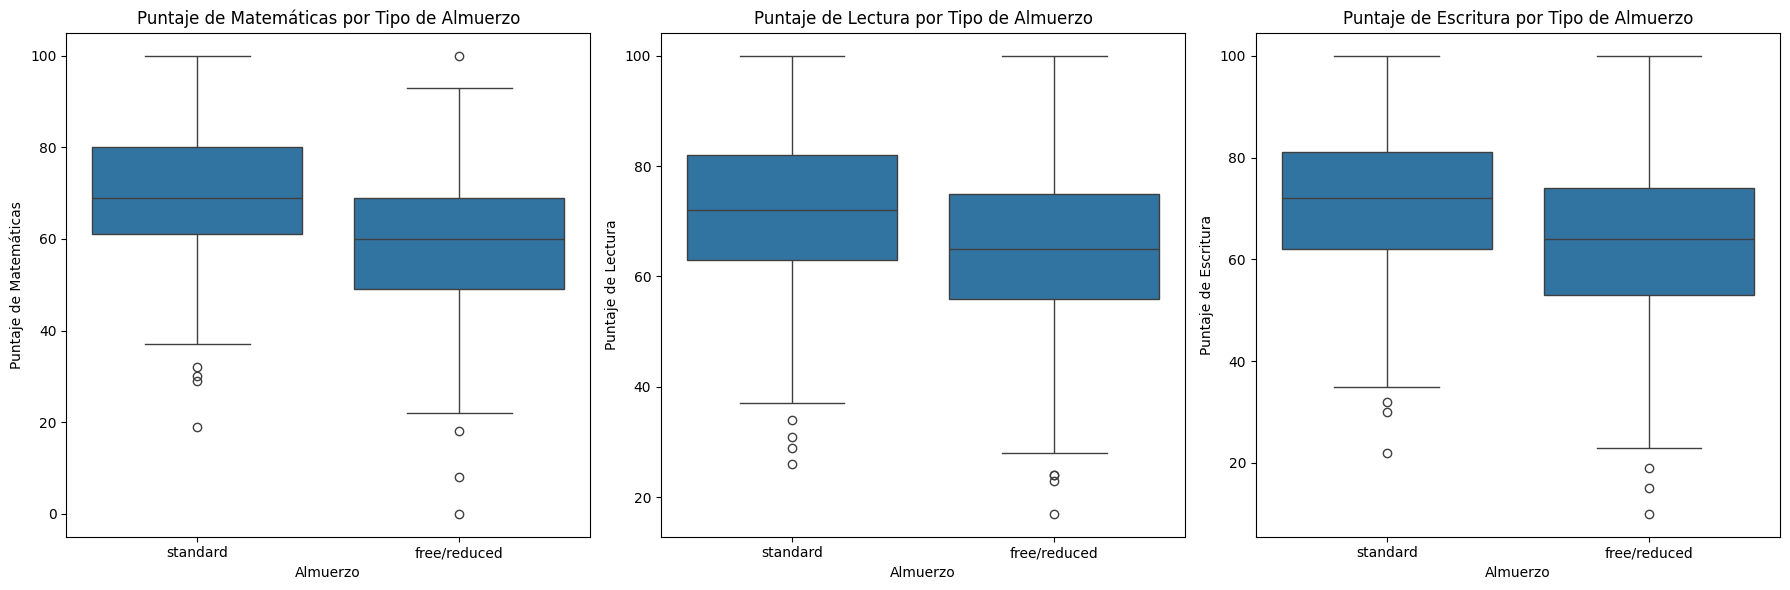

In [12]:
# Cargar el conjunto de datos
df = pd.read_csv('StudentsPerformance.csv')

plt.figure(figsize=(18, 6))

# Gráfico para el puntaje de Matemáticas
plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Puntaje de Matemáticas por Tipo de Almuerzo')
plt.xlabel('Almuerzo')
plt.ylabel('Puntaje de Matemáticas')

# Gráfico para el puntaje de Lectura
plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('Puntaje de Lectura por Tipo de Almuerzo')
plt.xlabel('Almuerzo')
plt.ylabel('Puntaje de Lectura')

# Gráfico para el puntaje de Escritura
plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Puntaje de Escritura por Tipo de Almuerzo')
plt.xlabel('Almuerzo')
plt.ylabel('Puntaje de Escritura')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


## **9. Conclusión**

Este laboratorio integró herramientas estadísticas y visuales para analizar relaciones entre variables. Las técnicas no paramétricas como Spearman, Kendall o Cramér’s V resultan útiles cuando los supuestos clásicos no se cumplen. Saber elegir la métrica correcta es clave para extraer insights confiables en el proceso de data discovery.

### **Interpretación de los Resultados**

Como se puede observar en los gráficos:

* **Puntaje de Matemáticas:** La mediana del grupo con almuerzo 'standard' es notablemente más alta que la del grupo 'free/reduced'.
* **Puntaje de Lectura:** Se repite el mismo patrón, donde el grupo 'standard' muestra una mediana y una distribución de puntajes superiores.
* **Puntaje de Escritura:** La tendencia es consistente, confirmando que los puntajes son visiblemente más altos para el grupo de almuerzo 'standard'.

### **Conclusión**

Los resultados visuales **confirman la hipótesis** planteada. Existe una clara asociación entre el tipo de almuerzo y el rendimiento académico. Este análisis demuestra la importancia de la formulación de hipótesis y la validación visual como parte fundamental del proceso de descubrimiento de datos.

---

# Gracias por completar este laboratorio!

---
